In [1]:
import numpy as np

def diversity_gradient(dfdw_train, dfdw_val, mylambda, sigma_p):
    """
    This is the gradient of the diversity term.

    Parameters
    ----------
    dfdw_train: float
        the gradient of the output of a neural network, with respect to a single weight, given a training sample.
    dfdw_val: float
        the gradient of the output of a neural network, with respect to a single weight, given a validation sample.
    mylambda: float
        the temperature parameter when estimating a posterior
    sigma_p: float
        the prior variance

    Returns
    -------
    grad: float
        the diversity gradient.
    """
    term1 = -(mylambda*dfdw_train**2+1/sigma_p)**(-2)*(2*mylambda*dfdw_train**3)*dfdw_val**2
    term2 = (mylambda*dfdw_train**2+1/sigma_p)**(-1)*2*dfdw_val**3
    grad = term1+term2
    return grad

Create Figure.

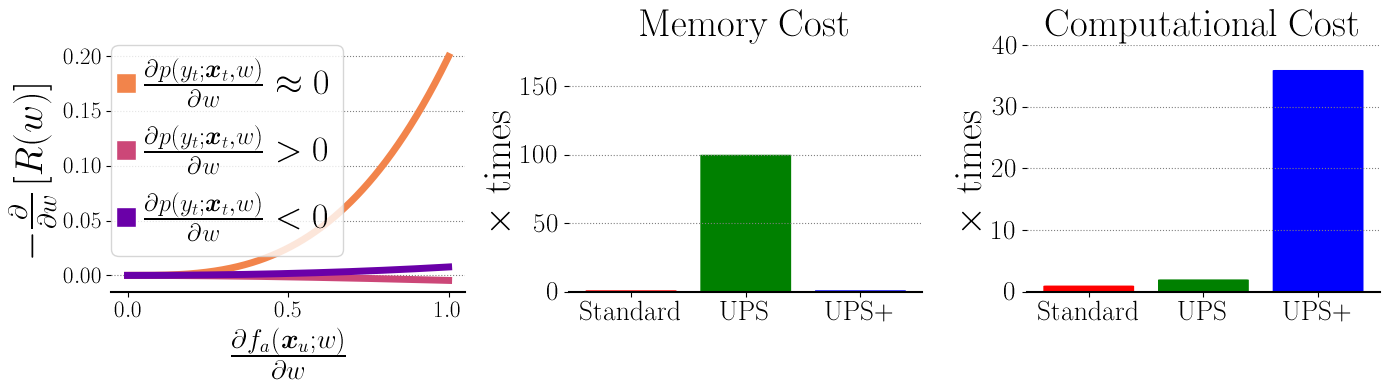

In [48]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

f, axs = plt.subplots(1, 3,figsize = (14, 4))

dfdw_val = np.linspace(0,1,1000)
dfdw_train = 0
sigmas_p = np.linspace(0.001,0.1,5)
colors = np.linspace(0.7,0.2,5)


size_font_title = 28
size_font_legend = 26
size_font_axis = 20
tick_size = 17  # 17
border_linewidth = 1.5

cmap = plt.colormaps["plasma"]
patches = []

z1 = diversity_gradient(dfdw_train = 0, dfdw_val= dfdw_val, mylambda=80, sigma_p=0.1)
z2 = diversity_gradient(dfdw_train = 4, dfdw_val= dfdw_val, mylambda=80, sigma_p=0.1)
z3 = diversity_gradient(dfdw_train = -4, dfdw_val= dfdw_val, mylambda=80, sigma_p=0.1)
axs[0].plot(dfdw_val, z1, linewidth=5, c=cmap(0.7), linestyle='-',alpha=1)
axs[0].plot(dfdw_val, z2, linewidth=5, c=cmap(0.5), linestyle='-',alpha=1)
axs[0].plot(dfdw_val, z3, linewidth=5, c=cmap(0.2), linestyle='-',alpha=1)
patches.append(Line2D([0], [0], marker='s', color='w', label=r'$\frac{\partial p(y_t;\boldsymbol{x}_t,w)}{\partial w}\approx 0$', markerfacecolor=cmap(0.7), markersize=15, lw=1))
patches.append(Line2D([0], [0], marker='s', color='w', label=r'$\frac{\partial p(y_t;\boldsymbol{x}_t,w)}{\partial w}>0$', markerfacecolor=cmap(0.5), markersize=15))
patches.append(Line2D([0], [0], marker='s', color='w', label=r'$\frac{\partial p(y_t;\boldsymbol{x}_t,w)}{\partial w}<0$', markerfacecolor=cmap(0.2), markersize=15))


# Figure formating
axs[0].grid(linestyle=':', color='grey', axis='y')
[i.set_linewidth(border_linewidth) for i in axs[0].spines.values()]
plt.tight_layout()
#plt.ylim(-10, 5)

axs[0].tick_params(axis='both', which='major', labelsize=tick_size)

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)

cmap = plt.colormaps["plasma"]

axs[0].legend(loc=0, handles=patches, fontsize=size_font_legend, borderaxespad=0, handletextpad=0.5, handlelength=0)
axs[0].set_xlabel(r'$\frac{\partial f_a(\boldsymbol{x}_u;w)}{\partial w}$', fontsize=size_font_title)
axs[0].set_ylabel(r'$-\frac{\partial}{\partial w} \left[R(w) \right]$', fontsize=size_font_title)
#axs[0].set_title(r'$\frac{\partial p(y_t;\boldsymbol{x}_t,w)}{\partial w}\approx 0$', fontsize=size_font_title)





from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

size_font_title = 28
size_font_legend = 16
size_font_axis = 20
tick_size = 17  # 17
border_linewidth = 1.5

cmap = plt.colormaps["plasma"]
patches = []

methods = ['Standard', 'UPS', 'UPS+']
times = [1,100,1]
colors = ['red', 'green', 'blue']



for method, time, color in zip(methods,times,colors):
    axs[1].bar(method,time,color=color)


# Figure formating
axs[1].grid(linestyle=':', color='grey', axis='y')
[i.set_linewidth(border_linewidth) for i in axs[1].spines.values()]
plt.tight_layout()
axs[1].set_ylim(0, 180)


axs[1].tick_params(axis='both', which='major', labelsize=size_font_axis)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)

cmap = plt.colormaps["plasma"]

#axs[1].legend(loc=4, handles=patches, fontsize=size_font_legend)
#axs[1].set_xlabel(r'$\frac{\partial f_a(\boldsymbol{x}_u;w)}{\partial w}$', fontsize=size_font_title)
axs[1].set_ylabel(r'$\times$ times', fontsize=size_font_title)
axs[1].set_title(r'Memory Cost', fontsize=size_font_title)

dfdw_val = np.linspace(0,1,1000)
dfdw_train1 = -4
mylambdas = [2,7,10,20,150]
colors = np.linspace(0.7,0.2,5)

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

size_font_title = 28
size_font_legend = 16
size_font_axis = 20
tick_size = 17  # 17
border_linewidth = 1.5

methods = ['Standard', 'UPS', 'UPS+']
times = [1,2,36] #[0.1,0.2,3.6]
colors = ['red', 'green', 'blue']



for method, time, color in zip(methods,times,colors):
    axs[2].bar(method,time,color=color)


# Figure formating
axs[2].grid(linestyle=':', color='grey', axis='y')
[i.set_linewidth(border_linewidth) for i in axs[2].spines.values()]
plt.tight_layout()
axs[2].set_ylim(0, 40)


axs[2].tick_params(axis='both', which='major', labelsize=size_font_axis)

axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)

cmap = plt.colormaps["plasma"]

#axs[2].legend(loc=4, handles=patches, fontsize=size_font_legend)
#axs[2].set_xlabel(r'$\frac{\partial f_a(\boldsymbol{x}_u;w)}{\partial w}$', fontsize=size_font_title)
axs[2].set_ylabel(r'$\times$ times', fontsize=size_font_title)
axs[2].set_title(r'Computational Cost', fontsize=size_font_title)



from matplotlib.patches import FancyBboxPatch
new_patches = []
for patch in reversed(axs[2].patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.0040,rounding_size=0.02",
                        ec="none", fc=color,
                        mutation_aspect=4
                        )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    axs[2].add_patch(patch)

new_patches = []
for patch in reversed(axs[1].patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.0040,rounding_size=0.02",
                        ec="none", fc=color,
                        mutation_aspect=4
                        )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    axs[1].add_patch(patch)

In [3]:
f.savefig('full.png', dpi=600)